In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
heart = pd.read_csv(r"C:\Users\user\Desktop\Project\Heart_stroke_prediction\Dataset\healthcare-dataset-stroke-data.csv")
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Lets check for the missing values
heart.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# We will now fill it the null values
heart["bmi"].fillna(heart["bmi"].median(), inplace = True)

In [6]:
heart.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Analysis

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# Lets check for the categorical variables
cat_var = [col for col in heart.columns if heart[col].dtype == "object"]
cat_var

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [10]:
cat_var

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Lets check their the amount of their categories

gender


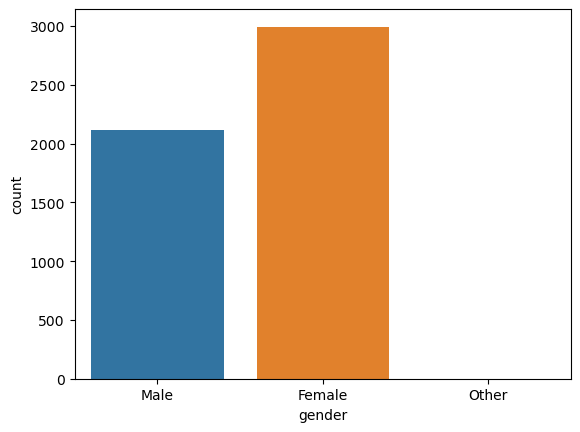

ever_married


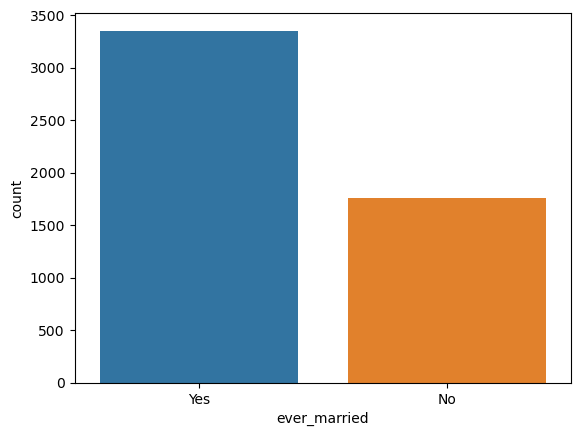

work_type


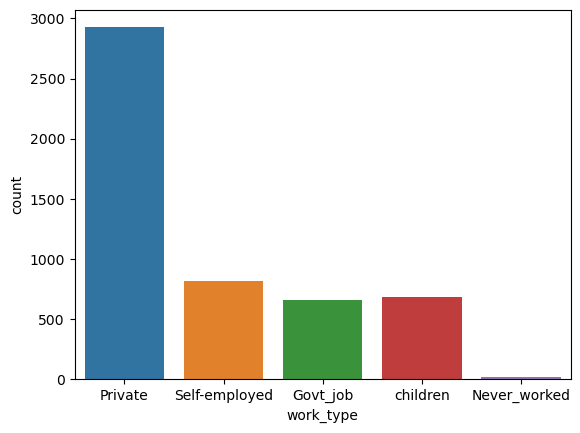

Residence_type


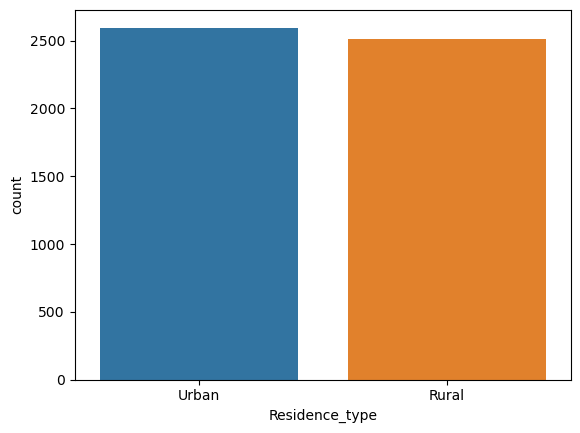

smoking_status


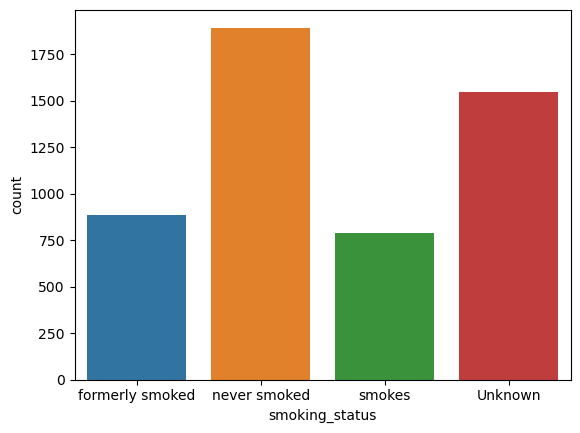

In [11]:
for col in cat_var:
    print(col)
    sns.countplot(data = heart, x = col)
    plt.show()


# From the graph above

- There are more female thn male
- Those ones that are ever married are much compared to those who are not
- Most people's work type in the dataset is private compared to others.

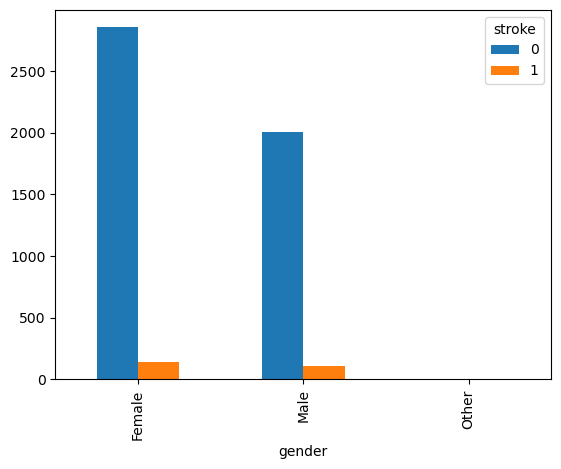

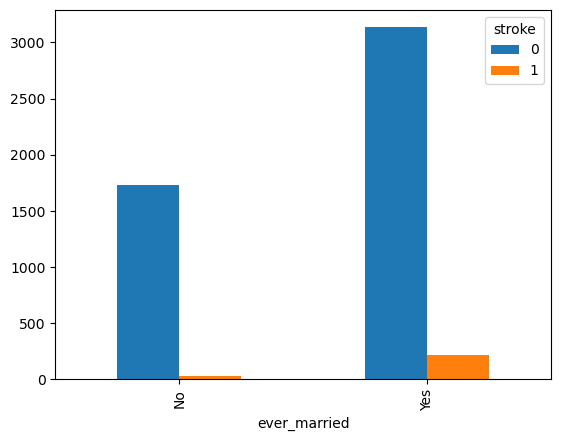

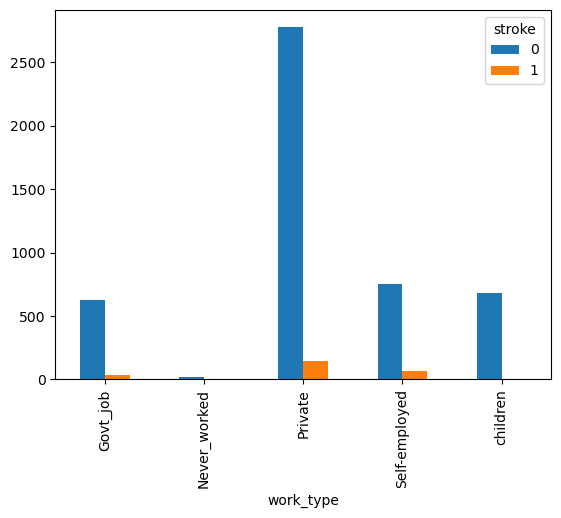

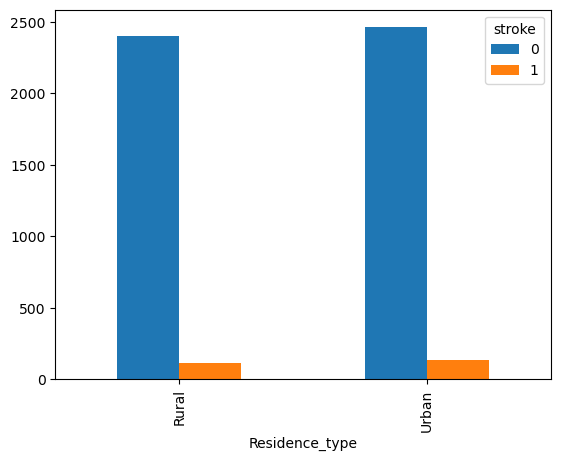

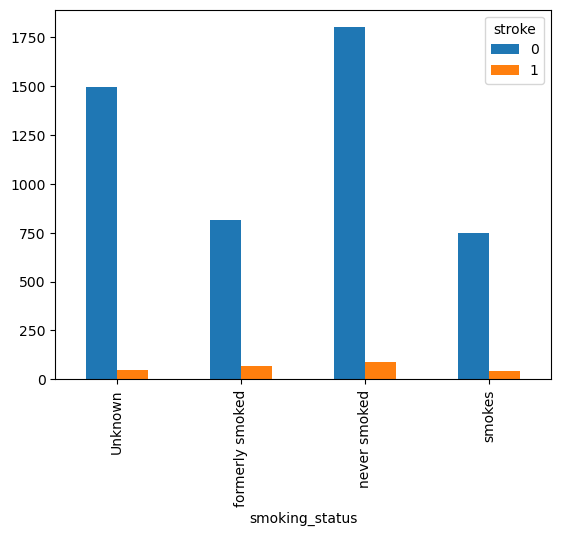

In [12]:
# Lets check how they vary with respect to the target variable


for col in cat_var:
    pd.crosstab(heart[col], heart["stroke"]).plot(kind = "bar")

# Numerical Variables

# Distribution

In [15]:
# Lets check for the numerical values
num_var = [col for col in heart.columns if heart[col].dtype == "float64"]
num_var

['age', 'avg_glucose_level', 'bmi']

age


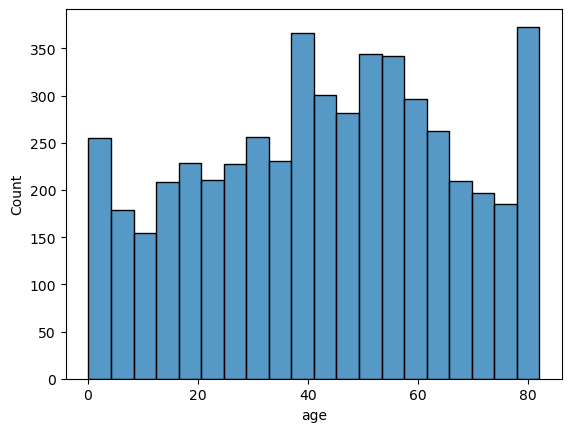

avg_glucose_level


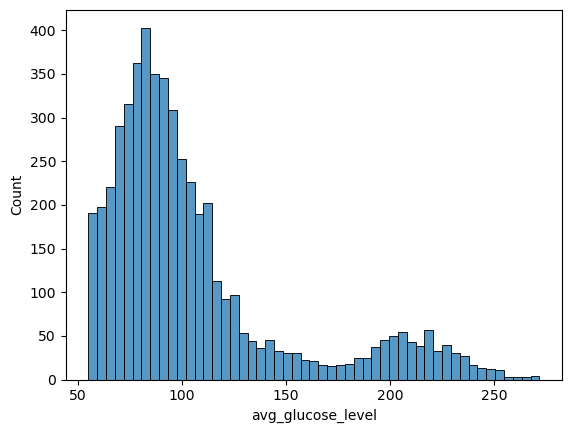

bmi


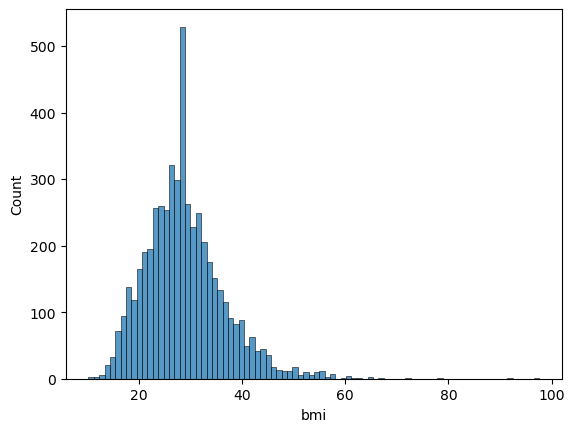

In [22]:
# Lets show the distribution and the outliers

for col in num_var:
    # Lets check for the distribution
    print(col)
    sns.histplot(data = heart, x = col)
    plt.show()

# Deductions
- The age is nowmally distributed (somehow)
- The avg_glucose_level is right skewed
- The bmi is normally distributed

age
_________________________
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


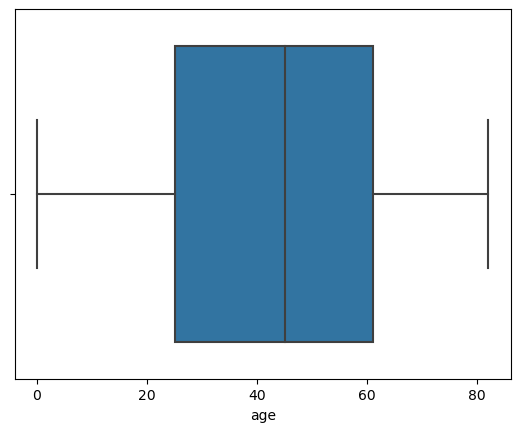

avg_glucose_level
_________________________
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


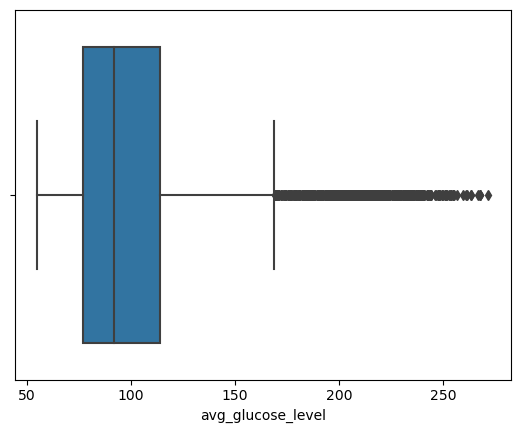

bmi
_________________________
count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


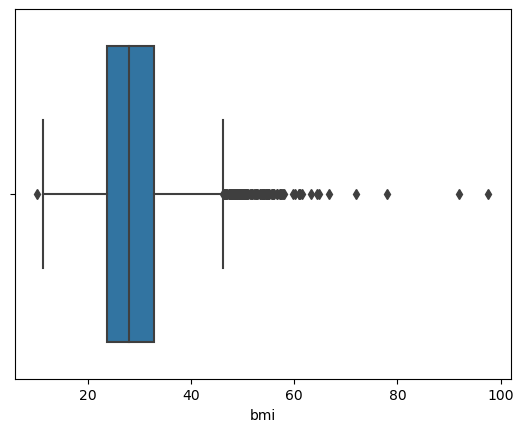

In [29]:
# Now Lets Check for outliers

for col in num_var:
    # Lets check for the distribution
    print(col)
    print("_________________________")
    print(heart[col].describe())
    sns.boxplot(data = heart, x = col)
    plt.show()

# Deductions
- Age doesn't have outlier
- Both the BMI and avg_glucose_level have outliers